# **Data Exploration**

### **Dependecies**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry

from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

## **Load Data**

In [4]:
from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

# Merge all organization csv's
def merge_responses():
    combined_df = pd.DataFrame()

    for key, values in CONSTANTS.ORGANIZATIONS.items():
        path = f"../../src/responses/response_{values[1]}.json"

        temp_df = pd.read_json(path)


        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    return combined_df

responses_df = merge_responses()
responses_df.head(5)

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_date_type,activity_status_code,description_narrative,last_updated_datetime,participating_org_ref,...,activity_date_iso_date,reporting_org_narrative,title_narrative_xml_lang,participating_org_narrative,description_narrative_xml_lang,contact_info_organisation_narrative,recipient_country_code,location_name_narrative,document_link_url,contact_info_department_narrative
0,[33130],DE-1-201822287-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3]",2,[Enhances the efficiency of the SADC Directora...,2024-02-29T00:00:00Z,[DE-1],...,"[2020-01-01T00:00:00Z, 2020-01-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
1,[33130],DE-1-201022094-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3, 4]",4,[For the domestic markets of the Member States...,2024-02-29T00:00:00Z,[DE-1],...,"[2010-07-01T00:00:00Z, 2010-07-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
2,[33130],DE-1-201222975-0,[Strengthening quality infrastructure for trad...,DE-1,[1],"[1, 2, 3, 4]",4,[The Southern African Development Community (S...,2024-02-29T00:00:00Z,[DE-1],...,"[2013-09-01T00:00:00Z, 2013-09-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
3,[33130],DE-1-201522135-0,[Increase in Trade and Consumer Protection in ...,DE-1,[1],"[1, 2, 3, 4]",4,[The SADC Protocol on Trade forms the legal ba...,2024-02-29T00:00:00Z,[DE-1],...,"[2017-01-01T00:00:00Z, 2017-01-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]","[Physikalisch-Technische Bundesanstalt (PTB), ...",NaN,NaN,NaN,NaN
4,[14010],DE-1-201920016-0,[Strengthening of Metrology for the Improvemen...,DE-1,[1],"[1, 2, 3]",2,[With a rapidly growing population and a promi...,2024-02-29T00:00:00Z,[DE-1],...,"[2022-05-01T00:00:00Z, 2022-05-01T00:00:00Z, 2...",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de]",[Bundesministerium für wirtschaftliche Zusamme...,"[en, de, en, de]",[Bundesministerium für wirtschaftliche Zusamme...,[AG],[Saint John's],NaN,NaN


In [5]:
responses_df.columns

Index(['sector_code', 'iati_identifier', 'title_narrative',
       'reporting_org_ref', 'sector_vocabulary', 'activity_date_type',
       'activity_status_code', 'description_narrative',
       'last_updated_datetime', 'participating_org_ref',
       'recipient_region_code', 'activity_date_iso_date',
       'reporting_org_narrative', 'title_narrative_xml_lang',
       'participating_org_narrative', 'description_narrative_xml_lang',
       'contact_info_organisation_narrative', 'recipient_country_code',
       'location_name_narrative', 'document_link_url',
       'contact_info_department_narrative'],
      dtype='object')

In [6]:
orga_code_map = {
    "XM-DAC-5-52": "GIZ",
    "XM-DAC-918-3": "EIB",
    44000: "WB",
    "XI-IATI-WBTF": "WBTF",
    "XI-IATI-IADB": "IAD",
    "XM-DAC-46004": "ADB",
    "XM-DAC-46002": "AfDB",
    "XM-DAC-5-7": "AA",
    "DE-1": "BMZ"
}

## **Orgamization Distribution**

In [7]:
orga_value_list = responses_df["reporting_org_ref"].value_counts().to_dict()
orga_value_list

{'DE-1': 31679,
 'XM-DAC-5-7': 7299,
 'XM-DAC-46002': 4417,
 44000: 4389,
 'XM-DAC-46004': 2653,
 'XI-IATI-IADB': 1769,
 'XI-IATI-WBTF': 994,
 'XM-DAC-918-3': 722,
 'XM-DAC-5-52': 48}

In [8]:
responses_df.groupby(['reporting_org_ref', 'activity_status_code']).size().unstack(fill_value=0)

activity_status_code,1,2,3,4,5,6
reporting_org_ref,,,,,,
44000,0,1845,2544,0,0,0
DE-1,0,7734,14353,9592,0,0
XI-IATI-IADB,0,435,58,1276,0,0
XI-IATI-WBTF,0,234,760,0,0,0
XM-DAC-46002,235,693,3301,0,188,0
XM-DAC-46004,1,1241,1373,17,21,0
XM-DAC-5-52,0,33,11,4,0,0
XM-DAC-5-7,257,723,2667,3593,51,8
XM-DAC-918-3,0,380,295,0,47,0


C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_12616\374706188.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orga_names, y=data_series.values, palette="Set3")


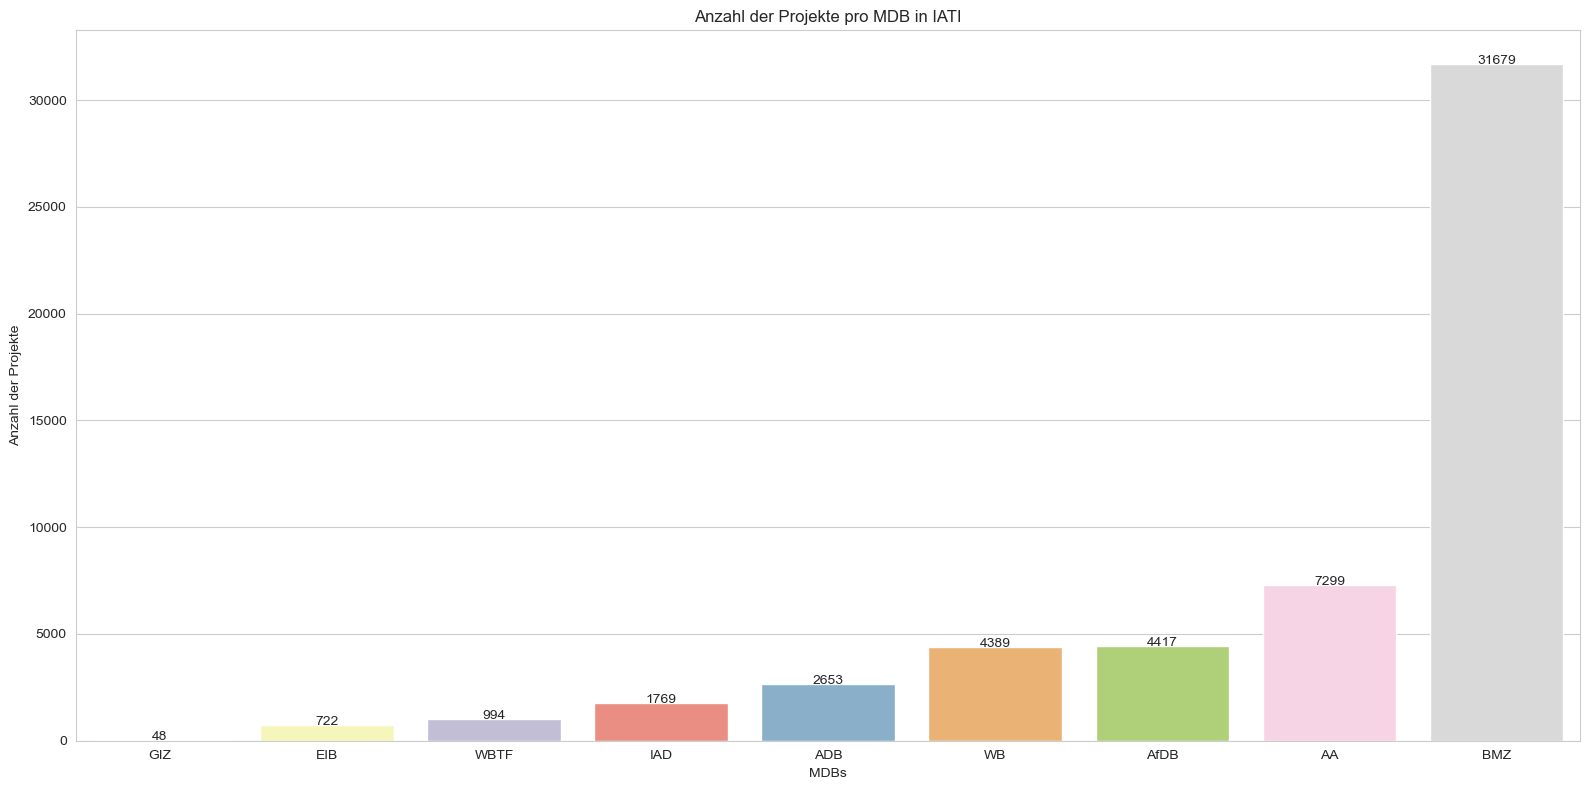

In [9]:
organizations = list(orga_value_list.keys())
counts = list(orga_value_list.values())

data_series = pd.Series(data=counts, index=organizations)
data_series = data_series.sort_values(ascending=True)  

orga_names = [orga_code_map.get(id, "Unknown ID") for id in data_series.index]

sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
sns.barplot(x=orga_names, y=data_series.values, palette="Set3")

for index, value in enumerate(data_series.values):
    plt.text(index, value, str(value), ha='center')  

plt.title('Anzahl der Projekte pro MDB in IATI')
plt.xlabel('MDBs')
plt.ylabel('Anzahl der Projekte')
plt.tight_layout()

plt.savefig('../../src/analysis/mdb_distribution.png')
plt.show()

<Figure size 1600x800 with 0 Axes>

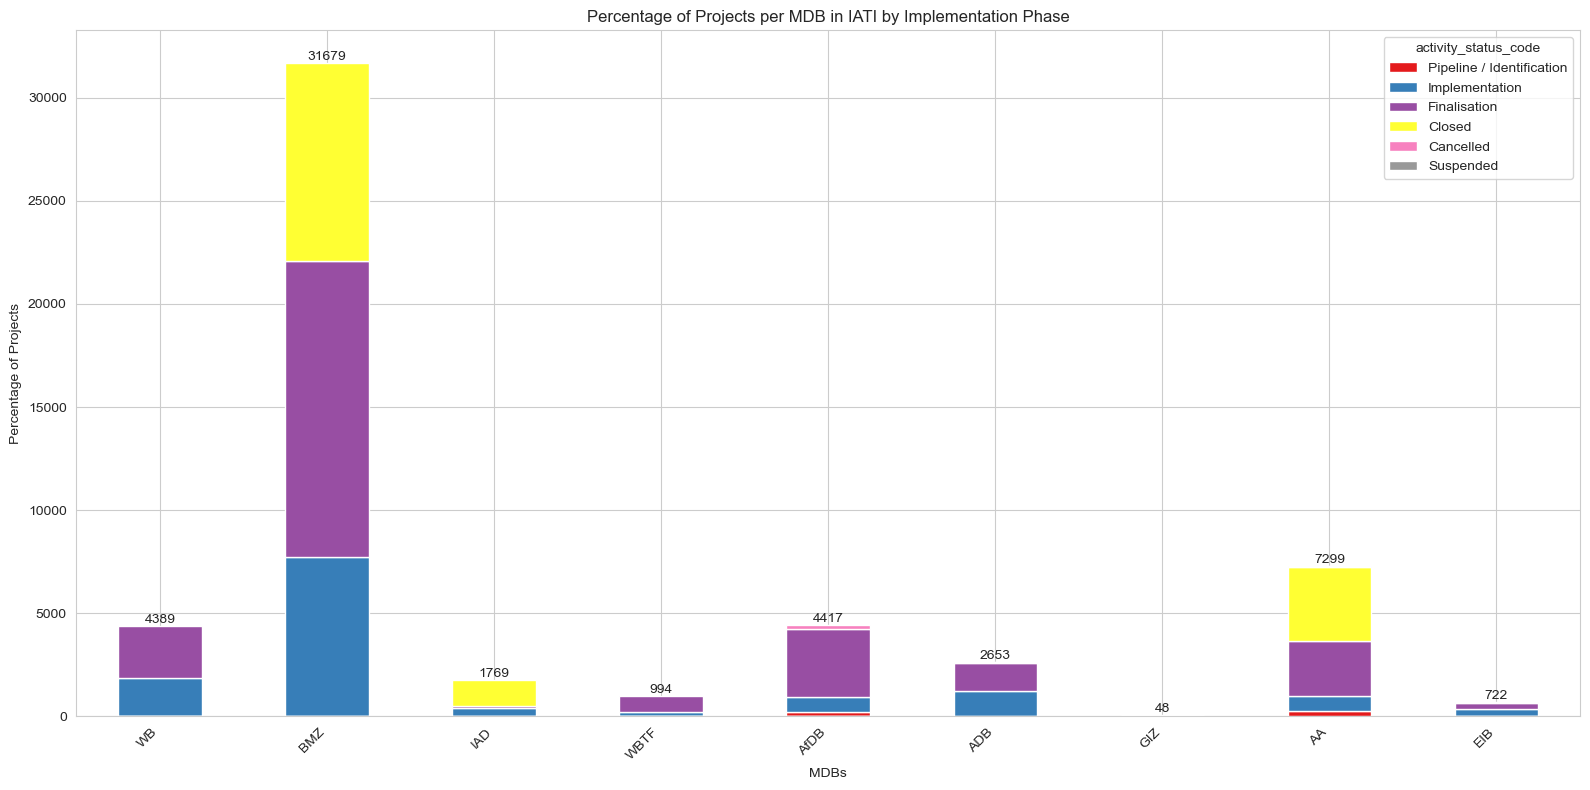

In [10]:
status_descriptions = {
    1: "Pipeline / Identification",
    2: "Implementation",
    3: "Finalisation",
    4: "Closed",
    5: "Cancelled",
    6: "Suspended"
}

aggregated_data = responses_df.pivot_table(index='reporting_org_ref', columns='activity_status_code', aggfunc='size', fill_value=0)
aggregated_data.columns = aggregated_data.columns.map(status_descriptions)


aggregated_data.index = [orga_code_map.get(id, "Unknown ID") for id in aggregated_data.index]

aggregated_data_percentage = aggregated_data.div(aggregated_data.sum(axis=1), axis=0) * 100

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

bar_plot = aggregated_data.plot(kind='bar', stacked=True, colormap='Set1', figsize=(16, 8))

plt.title('Percentage of Projects per MDB in IATI by Implementation Phase')
plt.xlabel('MDBs')
plt.ylabel('Percentage of Projects')
plt.xticks(rotation=45, ha="right")

"""
for idx, (org, row) in enumerate(aggregated_data.iterrows()):
    cum_height = 0 
    for col_idx, status in enumerate(aggregated_data.columns):
        height = row[status]
        percentage = aggregated_data_percentage.loc[org, status]
        if height > 700:  
            plt.text(idx, cum_height + height/2, f'{percentage:.1f}%', ha='center', va='center')
        cum_height += height 
"""
for n, (index, row) in enumerate(aggregated_data.iterrows()):
    total = row.sum()
    plt.text(n, total, str(total), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../../src/analysis/mdb_distribution_by_phase.png')
plt.show()

## **Countries of Projects**

In [11]:
country_counts = {}

# Iterate over each item in the 'recipient_country_code' column
for codes in responses_df['recipient_country_code'].dropna():
    for code in codes:  # Iterate through the list of country codes in each row
        if code in country_counts:
            country_counts[code] += 1  # Increment the count if the code already exists
        else:
            country_counts[code] = 1  # Initialize the count if the code is new

# country_counts now contains the count of appearances for each country code
print(country_counts)

{'AG': 7, 'VU': 59, 'MA': 625, 'UA': 1042, 'TG': 597, 'NA': 547, 'MW': 388, 'TZ': 507, 'CN': 923, 'TJ': 414, 'SY': 405, 'CG': 186, 'SV': 178, 'ML': 574, 'HN': 467, 'LS': 85, 'KR': 6, 'KP': 29, 'MX': 651, 'IL': 109, 'GN': 280, 'VE': 101, 'IN': 1899, 'AL': 159, 'CL': 84, 'FJ': 53, 'RS': 431, 'BD': 846, 'BT': 99, 'LK': 396, 'UG': 278, 'BO': 365, 'DO': 195, 'YE': 317, 'SB': 117, 'MM': 264, 'AZ': 181, 'MY': 43, 'TR': 250, 'SO': 280, 'BA': 341, 'AR': 337, 'MK': 156, 'ID': 915, 'TN': 727, 'PA': 139, 'CI': 416, 'NP': 623, 'KZ': 104, 'CV': 154, 'ZW': 566, 'LR': 262, 'JO': 254, 'MZ': 644, 'JM': 95, 'GT': 452, 'PE': 507, 'BR': 1153, 'BF': 641, 'KE': 564, 'NG': 502, 'CF': 157, 'CD': 1546, 'TL': 105, 'PH': 1296, 'DZ': 138, 'KH': 404, 'SL': 414, 'TM': 30, 'HR': 13, 'NI': 460, 'BJ': 485, 'MG': 557, 'GH': 451, 'MN': 359, 'PK': 566, 'AO': 157, 'CM': 962, 'SD': 250, 'NE': 267, 'SR': 50, 'ET': 1098, 'ST': 80, 'UZ': 294, 'PS': 418, 'LA': 369, 'EG': 477, 'SS': 399, 'FM': 27, 'GE': 528, 'ZM': 399, 'XK': 296

In [12]:
country_counts["MM"]

264

C:\Users\UserNA6153\AppData\Local\Temp\ipykernel_12616\1435253129.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


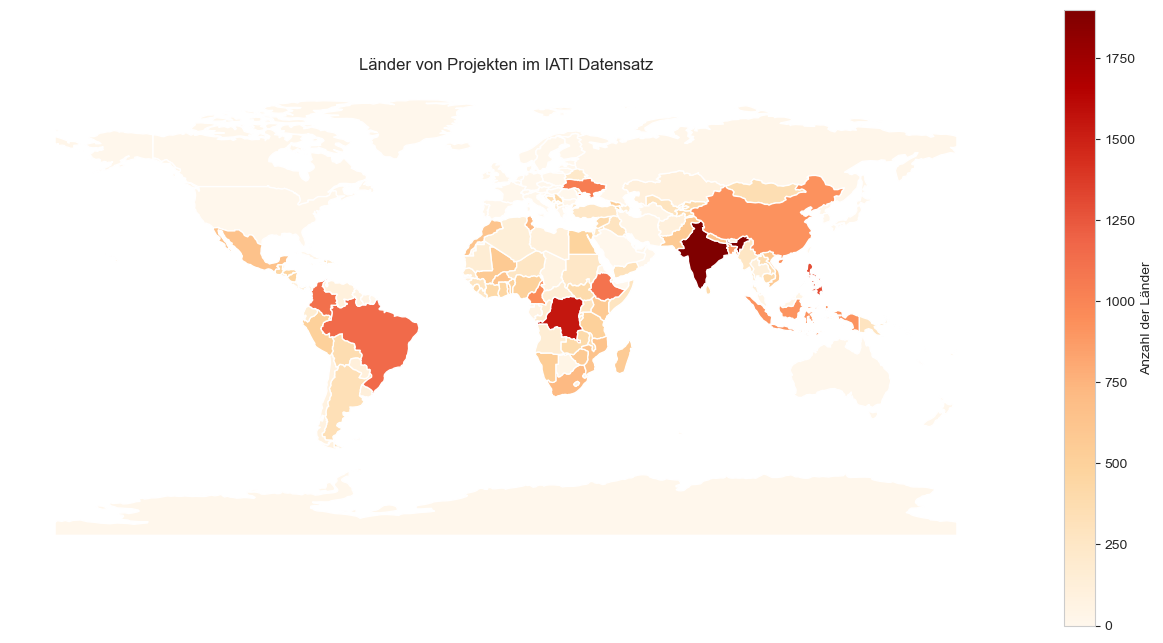

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load the shapefile directly (assuming you've already loaded it as 'world')
# Assuming 'country_counts' is your dictionary keyed by ISO 3166-1 alpha-2 codes

# Convert ISO 3166-1 alpha-2 codes to alpha-3 codes
country_counts_alpha3 = {}
for alpha2, count in country_counts.items():
        country = pycountry.countries.get(alpha_2=alpha2)
        if country:  # If the country was found
                alpha3 = country.alpha_3
                country_counts_alpha3[alpha3] = count

# Map country counts to the world dataframe using ISO 3166-1 alpha-3 codes
world['frequency'] = world['iso_a3'].map(country_counts_alpha3).fillna(0)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
world.plot(column='frequency', ax=ax, legend=True,
        legend_kwds={'label': "Anzahl der Länder"},
        cmap='OrRd')  # Using the 'OrRd' colormap for a heatmap-like effect
ax.set_title('Länder von Projekten im IATI Datensatz')
plt.axis('off')  # Hide axes

plt.savefig('../../src/analysis/country_map.png')
plt.show()